# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [2]:
df=pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [3]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


In [5]:
df.head(10)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
6,梁俊翔,11,13,10,10,14
7,林金鳳,8,9,10,10,8
8,許協旺,9,9,12,10,10
9,郭雅惠,10,15,12,11,9


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [6]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [7]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

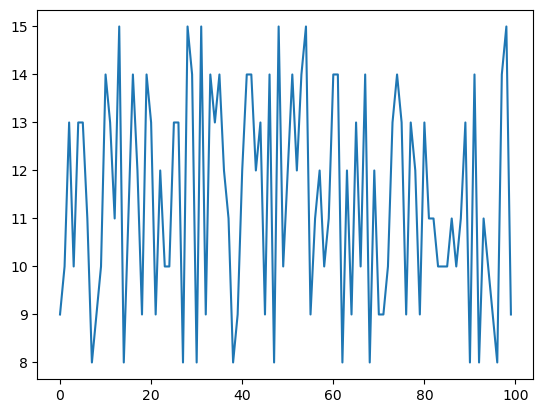

In [8]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

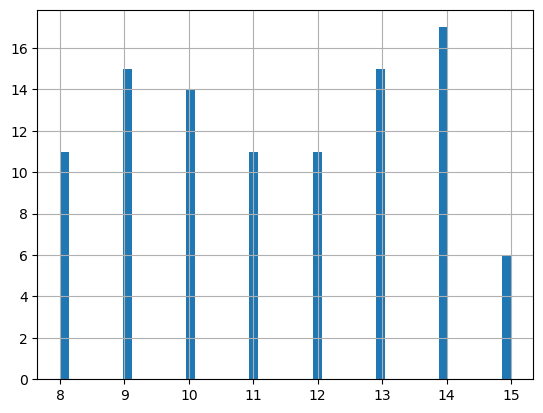

In [14]:
df.國文.hist(bins=50)

## 3 一些基本的資料分析

算平均。

In [15]:
df.國文.mean()

11.39

算標準差。

In [16]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [17]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [20]:
df.國文.corr(df.英文)

0.1601580159668431

只算兩科間的相關係數當然也可以。

In [21]:
df.國文.corr(df.數學)

-0.310898982217933

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [59]:
df['總級分']=df.sum(axis=1)
df

C:\Users\user\AppData\Local\Temp\ipykernel_4956\775484239.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['總級分']=df.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,163,49
1,胡玉華,10,10,10,8,9,134,40
2,黃淑婷,13,15,8,11,14,166,44
3,陳上紫,10,10,8,9,14,138,36
4,崔靜成,13,12,14,12,13,181,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,147,37
96,吳筱婷,8,10,14,10,15,160,46
97,陳家銘,14,9,11,8,12,153,45
98,李明威,15,9,8,9,15,152,40


### 【技巧】

有計算的當然也可以的。

In [26]:
df['加權'] = df.國文 + df.英文 + df.數學*2

In [27]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [33]:
df.sort_values(by='總級分',ascending=False)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
...,...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,47,42
32,林建亨,9,11,8,8,11,47,36
1,胡玉華,10,10,10,8,9,47,40
7,林金鳳,8,9,10,10,8,45,37


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [42]:
df2 = df.sort_values(by=['加權','總級分'],ascending=False)

### 【重點】重設 index

In [44]:
df2.index=range(1,101)
df2.head

<bound method NDFrame.head of       姓名  國文  英文  數學  自然  社會  總級分  加權
1    吳志遠  13  15  15   8   8   59  58
2    胡淳茜  12  15  14  13  11   65  55
3    詹威德  12  13  15  10  14   64  55
4    蔡亦瑄  13  13  14  13  12   65  54
5    李士賢  10  14  15  13  13   65  54
..   ...  ..  ..  ..  ..  ..  ...  ..
96   陳上紫  10  10   8   9  14   51  36
97   胡凱琳  10   8   9   9  15   51  36
98   林建亨   9  11   8   8  11   47  36
99   梁慧君   9   8   8   8  12   45  33
100  吳文伯   8   8   8  15  12   51  32

[100 rows x 8 columns]>

## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [45]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [58]:
df2[(df2.數學==15) & (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [61]:
df2['總級分']=df2.sum(axis=1)
df2.drop('總級分',axis=1,inplace=True)
df2

C:\Users\user\AppData\Local\Temp\ipykernel_4956\245000582.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['總級分']=df2.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [55]:
df3

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [62]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


In [63]:
df2.head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [64]:
df2[df2.姓名=='李士賢']

,姓名,國文,英文,數學,自然,社會,加權
5,李士賢,10,14,15,13,13,54


In [65]:
df2.drop(df2[df2.姓名=='李士賢'].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [75]:

import pandas_datareader.data as pdr
df = pdr.get_data_yahoo('AAPL')

TypeError: string indices must be integers

In [70]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [77]:
df = pd.read_csv('data/aapl.csv', index_col="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [81]:
df=df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-16,84.089996,85.361427,83.628571,85.358574,80.055435,69064100
2014-05-19,85.407143,86.761429,85.332855,86.370003,81.004021,79438800
2014-05-20,86.358574,86.628571,85.818573,86.387146,81.020103,58709000
2014-05-21,86.261429,86.671425,86.008568,86.615715,81.234459,49214900
2014-05-22,86.657143,87.121429,86.300003,86.752853,81.363091,50190000
...,...,...,...,...,...,...
2015-07-20,130.970001,132.970001,130.699997,132.070007,126.038368,58900200
2015-07-21,132.850006,132.919998,130.320007,130.750000,124.778625,76756400
2015-07-22,121.989998,125.500000,121.989998,125.220001,119.501183,115450600


#### 20 日的移動平均

<Axes: xlabel='Date'>

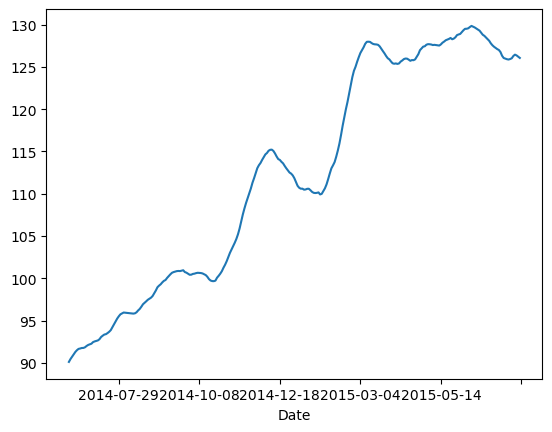

In [84]:
df.Close.rolling(20).mean().plot()

<Axes: xlabel='Date'>

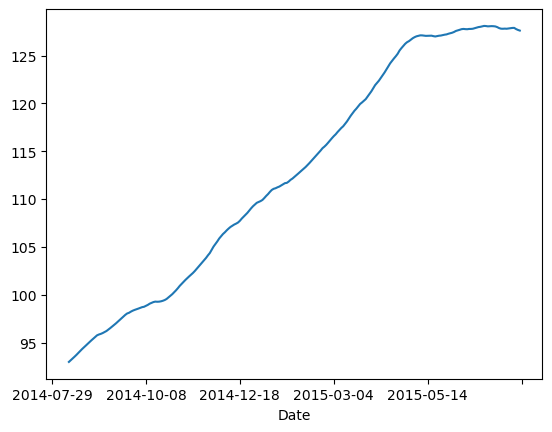

In [90]:
df.Close.rolling(60).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

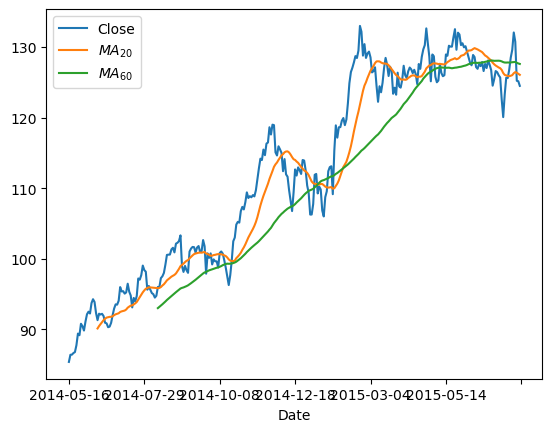

In [88]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [96]:
close=df.Close.values

len(close)

300

In [97]:
x=close[:-1]

In [98]:
y=close[1:]

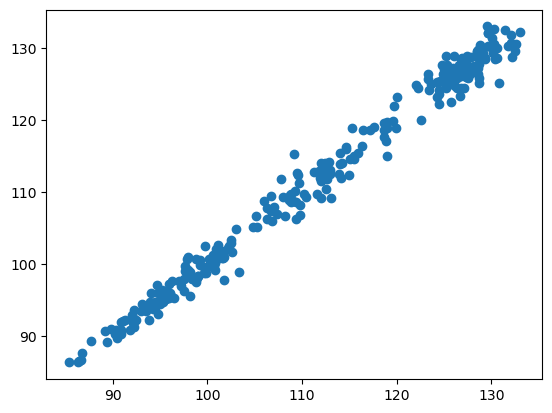

In [99]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [109]:
import numpy as np
import pandas as pd
mydata = np.random.randn(4,3)

In [103]:
mydata

array([[ 0.78981232,  0.11102138, -0.33672507],
       [-1.06081704,  0.01134511,  0.46377891],
       [ 1.35414597, -0.5256155 , -1.21488295],
       [-1.81942483,  0.97733376,  0.0246981 ]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [104]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [106]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))
df2

,A,B,C
0,0.789812,0.111021,-0.336725
1,-1.060817,0.011345,0.463779
2,1.354146,-0.525615,-1.214883
3,-1.819425,0.977334,0.024698


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [112]:
df3=pd.DataFrame(np.random.randn(3,3),columns=list("ABC"))

In [113]:
df3

,A,B,C
0,-0.705304,-0.150440,-0.810776
1,0.807643,-0.402211,0.106910
2,-0.296938,0.106116,0.938666


In [114]:
df4 = pd.concat([df2,df3],axis=0)

In [115]:
df4

,A,B,C
0,0.789812,0.111021,-0.336725
1,-1.060817,0.011345,0.463779
2,1.354146,-0.525615,-1.214883
3,-1.819425,0.977334,0.024698
0,-0.705304,-0.150440,-0.810776
1,0.807643,-0.402211,0.106910
2,-0.296938,0.106116,0.938666


前面我們弄得亂七八糟的 index 重設一下。

In [116]:
df4.index=range(len(df4))

In [117]:
df4

,A,B,C
0,0.789812,0.111021,-0.336725
1,-1.060817,0.011345,0.463779
2,1.354146,-0.525615,-1.214883
3,-1.819425,0.977334,0.024698
4,-0.705304,-0.150440,-0.810776
5,0.807643,-0.402211,0.106910
6,-0.296938,0.106116,0.938666


#### 横向的貼

In [120]:
df5=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [121]:
df5

,A,B,C,A,B,C
0,0.789812,0.111021,-0.336725,-0.705304,-0.150440,-0.810776
1,-1.060817,0.011345,0.463779,0.807643,-0.402211,0.106910
2,1.354146,-0.525615,-1.214883,-0.296938,0.106116,0.938666
3,-1.819425,0.977334,0.024698,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [124]:
df_names= pd.read_csv('data/names.csv',names=['姓名'])

In [125]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [129]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,6)),
                        columns=['國文','英文','數學','社會','自然','生物'])

In [142]:
df_grades.to_csv('data/test.csv',index=0)

In [140]:
df_grades

,國文,英文,數學,社會,自然,生物
0,14,11,13,11,12,6
1,11,12,7,10,7,12
2,9,11,7,12,11,13
3,13,7,9,13,6,11
4,6,8,14,9,6,12
...,...,...,...,...,...,...
95,8,6,7,6,6,12
96,6,13,7,8,11,14
97,13,11,15,13,13,11
98,15,9,7,15,12,9


In [143]:
df2=pd.read_csv("data/test.csv")

In [144]:
df2

,國文,英文,數學,社會,自然,生物
0,14,11,13,11,12,6
1,11,12,7,10,7,12
2,9,11,7,12,11,13
3,13,7,9,13,6,11
4,6,8,14,9,6,12
...,...,...,...,...,...,...
95,8,6,7,6,6,12
96,6,13,7,8,11,14
97,13,11,15,13,13,11
98,15,9,7,15,12,9


In [145]:
df4=pd.concat([df_names,df2],axis=1)

In [146]:
df4

,姓名,國文,英文,數學,社會,自然,生物
0,羅雅慧,14,11,13,11,12,6
1,王紹尹,11,12,7,10,7,12
2,黃季坤,9,11,7,12,11,13
3,許正書,13,7,9,13,6,11
4,張鈞蓮,6,8,14,9,6,12
...,...,...,...,...,...,...,...
95,陳君生,8,6,7,6,6,12
96,曾桂甫,6,13,7,8,11,14
97,林欣怡,13,11,15,13,13,11
98,林佳霖,15,9,7,15,12,9
